In [1]:
import os
import torch
from torchvision import transforms

In [2]:
# change the cwd to the project root
os.chdir("..")

In [3]:
from data.dataloader import cwd_splitter, cwd_loader
root_dir = "/data_hdd1/users/Talha/data/cwd30/dataset/"
train_dict, test_dict = cwd_splitter(root_dir, 0.8)

# train and test loader
# convert to tensor transform
transform = transforms.Compose([transforms.ToTensor()])
train_loader = cwd_loader(train_dict, batch_size=1, shuffle=True, transform=transform)
test_loader = cwd_loader(test_dict, batch_size=1, shuffle=False, transform=transform)

In [4]:
len(train_loader.dataset.key2lbl.keys())

30

torch.Size([1, 3, 512, 512])
torch.Size([1])


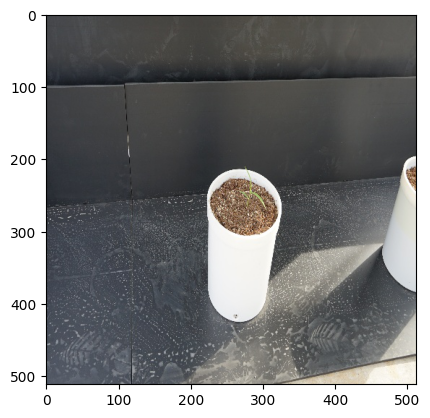

[29]
fall-panicum


In [5]:
# plot an imag and a label from the train loader
import matplotlib.pyplot as plt
import numpy as np

for i, (img, label) in enumerate(train_loader):
    print(img.shape)
    print(label.shape)
    # convert the tensor to numpy array
    img = img.numpy()
    label = label.numpy()
    # change the shape from (1, 3, 512, 512) to (512, 512, 3)
    img = np.transpose(img, (0, 2, 3, 1))
    plt.imshow(np.squeeze(img), cmap='gray')
    plt.show()
    print(label)
    print(train_loader.dataset.lbl2key[label[0]])
    break

In [6]:
import timm

In [7]:
# data loader for iNaturalist
from data.dataloader import inat_loader, inat_files

train_dir = "/data_hdd1/users/Talha/inat2021/"
train_files, val_files, dir_to_label = inat_files(train_dir)

In [8]:
print("Training files: ", len(train_files))
print("Validation files: ", len(val_files))

Training files:  213550
Validation files:  42710


In [9]:
transform = transforms.Compose([transforms.ToTensor()])
train_loader = inat_loader(train_files, dir2lbl=dir_to_label, batch_size=1, shuffle=True, transform=transform)
test_loader = inat_loader(val_files, dir2lbl=dir_to_label, batch_size=1, shuffle=False, transform=transform)

torch.Size([1, 3, 250, 500])
torch.Size([1])


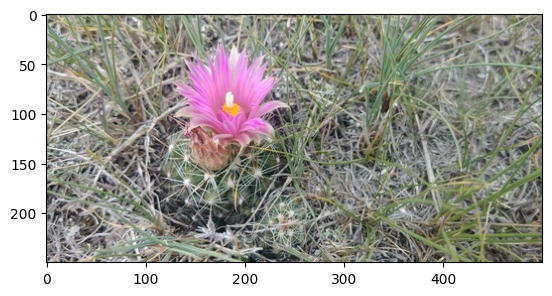

[1646]
07375_Plantae_Tracheophyta_Magnoliopsida_Caryophyllales_Cactaceae_Escobaria_vivipara


In [10]:
# plot an imag and a label from the train loader
import matplotlib.pyplot as plt
import numpy as np

for i, (img, label) in enumerate(train_loader):
    print(img.shape)
    print(label.shape)
    # convert the tensor to numpy array
    img = img.numpy()
    label = label.numpy()
    # change the shape from (1, 3, 512, 512) to (512, 512, 3)
    img = np.transpose(img, (0, 2, 3, 1))
    plt.imshow(np.squeeze(img), cmap='gray')
    plt.show()
    print(label)
    print(train_loader.dataset.lbl2key[label[0]])
    break

In [11]:
len(list(train_loader.dataset.lbl2key.keys()))

4271

In [66]:
checkpoint_path = ""

if checkpoint_path:
    print("Loading checkpoint...")

In [30]:
from timm.models.resnet import default_cfgs

In [42]:
default_cfgs['resnet50'].default.to_dict()

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth',
 'hf_hub_id': 'timm/',
 'custom_load': False,
 'input_size': (3, 224, 224),
 'test_input_size': (3, 288, 288),
 'fixed_input_size': False,
 'interpolation': 'bicubic',
 'crop_pct': 0.95,
 'test_crop_pct': 1.0,
 'crop_mode': 'center',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'num_classes': 1000,
 'pool_size': (7, 7),
 'first_conv': 'conv1',
 'classifier': 'fc',
 'origin_url': 'https://github.com/huggingface/pytorch-image-models',
 'paper_ids': 'arXiv:2110.00476'}

In [46]:
# change the url to the local path
default_cfgs['resnet50']['url'] = "/data_hdd1/users/khubaib/CWD30/output/train/20231101-115809-resnet50_a1_in1k-224/checkpoint-29.pth.tar"

TypeError: 'DefaultCfg' object does not support item assignment

In [54]:
ptcfg = timm.models._registry.get_pretrained_cfg(model_name)

In [55]:
ptcfg.pop('url', None)

AttributeError: 'PretrainedCfg' object has no attribute 'pop'

In [4]:
import timm
from timm import utils

utils.setup_default_logging()


model_name = 'vit_base_patch16_224.augreg2_in21k_ft_in1k'
ptcfg = timm.models._registry.get_pretrained_cfg(model_name)
ptcfg.url = None
pretrained_weights = '/data_hdd1/users/Talha/cwd_chkpts/clf_cwd.vit_base_patch16_224.augreg2_in21k_ft_in1k.pth'
ptcfg.file = pretrained_weights
ptcfg.num_classes = 30
print(ptcfg)


# load timm resnet model with a checkpoint
model = timm.create_model(
    model_name,
    pretrained=True,
    pretrained_cfg=ptcfg,
    num_classes=4271,
    in_chans=3,
)

# from timm.models import load_checkpoint

# load_checkpoint(model, pretrained_weights)

PretrainedCfg(url=None, file='../output/train/20231108-211157-vit_base_patch16_224_augreg2_in21k_ft_in1k-224/checkpoint-12.pth.tar', state_dict=None, hf_hub_id='timm/vit_base_patch16_224.augreg2_in21k_ft_in1k', hf_hub_filename=None, source=None, architecture='vit_base_patch16_224', tag='augreg2_in21k_ft_in1k', custom_load=False, input_size=(3, 224, 224), test_input_size=None, min_input_size=None, fixed_input_size=True, interpolation='bicubic', crop_pct=0.9, test_crop_pct=None, crop_mode='center', mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5), num_classes=4271, label_offset=None, label_names=None, label_descriptions=None, pool_size=None, test_pool_size=None, first_conv='patch_embed.proj', classifier='head', license=None, description=None, origin_url=None, paper_name=None, paper_ids=None, notes=None)


Loading pretrained weights from file (../output/train/20231108-211157-vit_base_patch16_224_augreg2_in21k_ft_in1k-224/checkpoint-12.pth.tar)
Loading pretrained weights from file (../output/train/20231108-211157-vit_base_patch16_224_augreg2_in21k_ft_in1k-224/checkpoint-12.pth.tar)
Loading pretrained weights from file (../output/train/20231108-211157-vit_base_patch16_224_augreg2_in21k_ft_in1k-224/checkpoint-12.pth.tar)
Loading pretrained weights from file (../output/train/20231108-211157-vit_base_patch16_224_augreg2_in21k_ft_in1k-224/checkpoint-12.pth.tar)
Loaded state_dict from checkpoint '../output/train/20231108-211157-vit_base_patch16_224_augreg2_in21k_ft_in1k-224/checkpoint-12.pth.tar'
Loaded state_dict from checkpoint '../output/train/20231108-211157-vit_base_patch16_224_augreg2_in21k_ft_in1k-224/checkpoint-12.pth.tar'
Loaded state_dict from checkpoint '../output/train/20231108-211157-vit_base_patch16_224_augreg2_in21k_ft_in1k-224/checkpoint-12.pth.tar'
Loaded state_dict from checkp

In [5]:
model.num_classes

4271

In [ ]:
python validate.py --data-dir '/data_hdd1/users/Talha/inat2021/' --checkpoint '/data_hdd1/users/khubaib/CWD30/output/train/20231101-115809-resnet50_a1_in1k-224/checkpoint-29.pth.tar' --model 'resnet50.a1_in1k' --num-classes 4271